# Load J60 instance

In [1]:
from src.load_data import Instance

In [2]:
path = '../data/j60.sm/j601_1.sm'

instance = Instance.read_instance(path)

/Users/belensantamaria/doctorado/RCMPSP/RCMPSP/src/load_data.py:234: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(successors),
/Users/belensantamaria/doctorado/RCMPSP/RCMPSP/src/load_data.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(predecessors),


In [3]:
instance.n_jobs

62

In [4]:
instance.n_resources

4

In [5]:
instance.resource_availability

array([13, 11, 12, 13])

In [6]:
instance.t_max

77

In [7]:
len(instance.successors)

62

In [8]:
len(instance.predecessors)

62

In [9]:
len(instance.durations)

62

# Apply heuristic

In [10]:
from src.heuristic import schedule_jobs

In [11]:
solution =  schedule_jobs(instance)

In [12]:
solution.makespan

133

# Plot resource usage

In [13]:
import matplotlib.pyplot as plt
import numpy as np

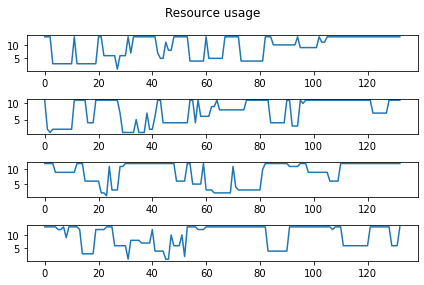

In [14]:
resources = np.concatenate(solution.resource_usage)

fig, axes = plt.subplots(resources.shape[1], 1)

fig.suptitle("Resource usage")

for i in range(resources.shape[1]):
    axes[i].plot(resources[:, i])

plt.tight_layout()

# Run experiment

In [15]:
import glob
import re

In [16]:
solution_path = "../data/j60lb.sm"

with open(solution_path) as f:
    lines = f.read()

In [17]:
solutions = {}
separator = re.compile("\=+")
for s in separator.split(lines)[4].split("\n")[1:-1]:
    if s.split()[4]=='*':
        solutions['j60' + s.split()[0] + '_' + s.split()[1] + '.sm'] = int(s.split()[2])

In [18]:
folder_path = "../data/j60.sm"

relative_deviations = []

for sol in solutions:
    problem_path = folder_path + sol
    instance = Instance.read_instance(problem_path)
    solution =  schedule_jobs(instance)
    
    deviation = np.abs(solution.makespan-solutions[sol])/solutions[sol]
    relative_deviations.append(deviation)

/Users/belensantamaria/doctorado/RCMPSP/RCMPSP/src/load_data.py:234: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(successors),
/Users/belensantamaria/doctorado/RCMPSP/RCMPSP/src/load_data.py:235: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(predecessors),


In [19]:
np.mean(relative_deviations)

0.7881495737485539

In [20]:
np.max(relative_deviations)

2.022727272727273